In [75]:
import os, subprocess
import json
import uproot
import awkward as ak
import numpy as np
from coffea import processor, util, hist

%matplotlib inline
from matplotlib import lines as mlines
import matplotlib.pyplot as plt
from cycler import cycler

In [76]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.1
lumis['2018'] = 59.9

nfiles_mc = {}
nfiles_mc['2016'] = 113
nfiles_mc['2017'] = 167
nfiles_mc['2018'] = 201

nfiles_data = {}
nfiles_data['2016'] = 101
nfiles_data['2017'] = 97
nfiles_data['2018'] = 133

with open('xsec.json') as f:
    xs = json.load(f)

with open('pmap.json') as f:
    pmap = json.load(f)

In [77]:
year = '2018'
outsum = processor.dict_accumulator()

In [78]:
# Load all MC
for n in range(1,nfiles_mc[year]+1):
    print(n)
    filename = 'condor/outfiles/'+year+'_'+str(n)+'.coffea'
    if os.path.isfile(filename):
        out = util.load(filename)
        outsum.add(out)
    else:
        print("File " + filename + " is missing")
        
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
outsum['cutflow'].scale(scale_lumi, 'dataset')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106


In [79]:
# Load all data
for n in range(1,nfiles_data[year]+1):
    print(n)
    filename = 'condor/outdata/'+year+'_'+str(n)+'.coffea'
    if os.path.isfile(filename):
        out = util.load(filename)
        outsum.add(out)
    else:
        print("File " + filename + " is missing")
        
# BE CAREFUL NOT TO UNBLIND
# Can you figure out how to blind it at this step???

1
2
3
4
5
6
7
8
9
10
File condor/outdata/2018_10.coffea is missing
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
File condor/outdata/2018_40.coffea is missing
41
42
43
44
45
46
47
File condor/outdata/2018_47.coffea is missing
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68


In [80]:
templates = outsum['cutflow'].group('dataset', hist.Cat('process', 'Process'), pmap)

/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f8ebc062198>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


In [81]:
cutflow = templates.sum('genflavor').integrate('region','muoncontrol').integrate('process','muondata')
cutflow.values()

{(): array([9.42229998e+08, 1.60692195e+08, 7.06735000e+05, 6.20238000e+05,
        6.20238000e+05, 2.24209000e+05, 7.38880000e+04, 5.69400000e+03,
        5.14300000e+03, 2.38700000e+03, 1.90000000e+02])}

In [82]:
templates1 = outsum['templates1'].group('dataset', hist.Cat('process', 'Process'), pmap).integrate('region','muoncontrol')

/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f8ebd69f320>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


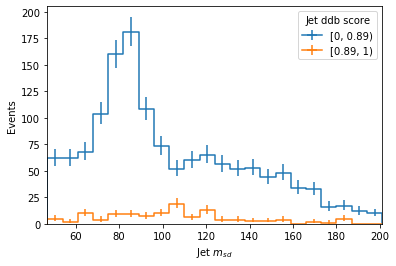

In [83]:
hist.plot1d(templates1.sum('pt1').integrate('process','muondata'),overlay='ddb1')

In [84]:
templates2 = outsum['templates2'].group('dataset', hist.Cat('process', 'Process'), pmap).integrate('region','muoncontrol')

/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f8ebc064c50>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


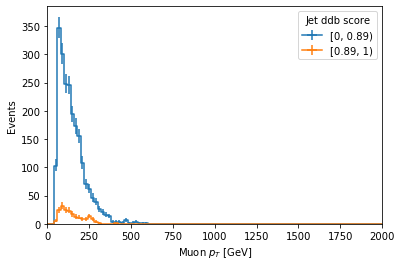

In [85]:
hist.plot1d(templates2.sum('msd1','etamu').integrate('process','muondata'),overlay='ddb1')

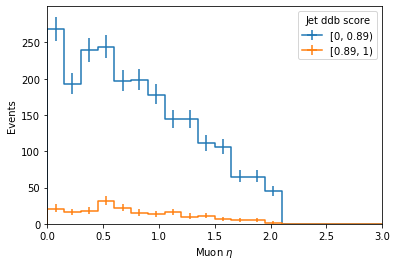

In [86]:
hist.plot1d(templates2.sum('msd1','ptmu').integrate('process','muondata'),overlay='ddb1')

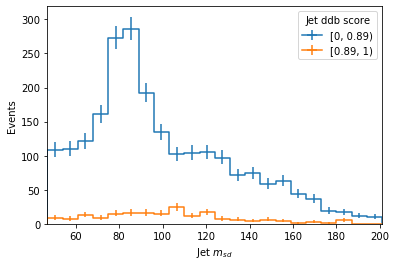

In [87]:
hist.plot1d(templates2.sum('ptmu','etamu').integrate('process','muondata'),overlay='ddb1')

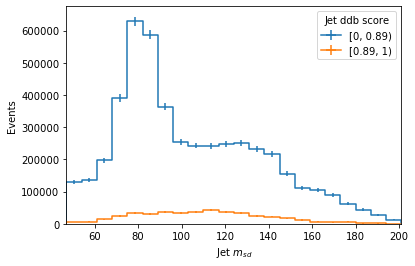

In [88]:
hist.plot1d(templates2.sum('ptmu','etamu').integrate('process','ttbar'),overlay='ddb1')